In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolorsx
from matplotlib.patches import Circle

import os
from glob import glob

from astropy.io import fits
from astropy.wcs import WCS
from astropy.wcs.utils import proj_plane_pixel_scales
from astropy.nddata import Cutout2D

from reproject import reproject_exact

from AstroColour.AstroColour import RGB

import matplotlib.patheffects as patheffects

%matplotlib widget

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig_width_pt = 244.0  # Get this from LaTeX using \the\columnwidth
text_width_pt = 508.0 # Get this from LaTeX using \the\textwidth

# plt.rc('font', size=21)
# plt.rc('xtick', labelsize=21)
# plt.rc('ytick', labelsize=21)

inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt*1.5 # width in inches
fig_width_full = text_width_pt*inches_per_pt  # 17

Filename: /Users/zgl12/Downloads/MAST_2025-11-13T13_31_04.339Z/MAST_2025-11-13T13_31_04.339Z/JWST/jw01860005001_02101_00002_mirimage_i2d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     352   ()      
  1  SCI           1 ImageHDU        75   (1029, 1019)   float32   
  2  ERR           1 ImageHDU        10   (1029, 1019)   float32   
  3  CON           1 ImageHDU        10   (1029, 1019, 1)   int32   
  4  WHT           1 ImageHDU         9   (1029, 1019)   float32   
  5  VAR_POISSON    1 ImageHDU         9   (1029, 1019)   float32   
  6  VAR_RNOISE    1 ImageHDU         9   (1029, 1019)   float32   
  7  VAR_FLAT      1 ImageHDU         9   (1029, 1019)   float32   
  8  ASDF          1 BinTableHDU     11   1R x 1C   [16724B]   
Pixel coordinates: x=1172.20, y=966.92
(1019, 1029)


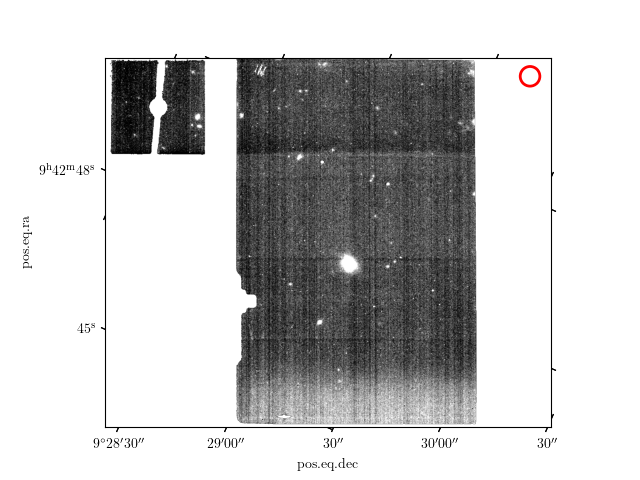

In [15]:
folder = '/Users/zgl12/Downloads/MAST_2025-11-13T13_31_04.339Z/MAST_2025-11-13T13_31_04.339Z/JWST/'

file = glob(folder + '*.fit*')[0]

ra = 145.72221 
dec = 9.49494

hdul = fits.open(file)
data = hdul[1].data
header = hdul[0].header
hdul.info()
wcs = WCS(hdul[1].header)
hdul.close()

x, y = wcs.all_world2pix(ra, dec, 0)

print(f'Pixel coordinates: x={x:.2f}, y={y:.2f}')
print(data.shape)
    
    
    
plt.figure()
ax = plt.subplot(projection=wcs)
im = ax.imshow(data, origin='lower', cmap='gray', vmin=np.nanpercentile(data, 5), vmax=np.nanpercentile(data, 99))
ax.scatter(x, y, s=200, edgecolor='red', facecolor='none', lw=2)
# plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05, label='MJy/sr')
# plt.title(os.path.basename(file))
plt.show()

In [12]:
file

'/Users/zgl12/Downloads/MAST_2025-11-13T13_31_04.339Z/MAST_2025-11-13T13_31_04.339Z/JWST/jw01860005001_02101_00002_mirimage_i2d.fits'